In [7]:
import hiive.mdptoolbox, hiive.mdptoolbox.example, hiive.mdptoolbox.mdp
import hiive.mdptoolbox as mdptoolbox

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import gym
import numpy as np

## MDP Definition

- is the expected value of all possible future rewards, on all possible actions.

In [382]:
class MarkovDecisionProcess(object):
    
    def __init__(self, problem_name, discount_factor=0.9, alpha=0.5):
        self.problem_name = problem_name 
        self.discount_factor = discount_factor
        self.alpha = alpha
        
    def setup_env(self):
        self.env = gym.make(self.problem_name)
        self.num_actions = self.env.nA
        self.num_states = self.env.nS
        self.rewards = np.zeros([self.num_actions, self.num_states, self.num_states])
        self.transitions = np.zeros([self.num_actions, self.num_states, self.num_states])
        self.generate_matrices()
        
    def generate_matrices(self):
        for s in range(self.num_states):
            for a in range(self.num_actions):
                inner = self.env.P[s][a]
                for t in inner:
                    transition_prob, next_state, reward, done = t
                    self.transitions[a][s][next_state] += transition_prob
                    self.rewards[a][s][next_state] = reward
                
    def policy_iteration(self):
        pi = mdptoolbox.mdp.PolicyIteration(self.transitions, self.rewards, self.discount_factor)
        pi.setVerbose()
        self.output = pi.run()
        self.policy = pi.policy
        
    def value_iteration(self):
        vi = mdptoolbox.mdp.ValueIteration(self.transitions, self.rewards, self.discount_factor)
        vi.setVerbose()
        self.output = vi.run() 
        self.policy = vi.policy
        
    def q_learning(self):
        ql = mdptoolbox.mdp.QLearning(self.transitions, self.rewards, self.discount_factor, alpha=self.alpha, alpha_decay=-0.00005, run_stat_frequency=1)
        ql.setVerbose()
        self.output = ql.run()
        self.policy = ql.policy
        self.Q = ql.Q
    
    def run(self, rl_algo):
        self.setup_env()
        if rl_algo == "policy_iteration":
            self.policy_iteration()
        elif rl_algo == "value_iteration":
            self.value_iteration()
        elif rl_algo == "q_learning":
            self.q_learning()
        else:
            print("Unsupported reinforcement learning algorithm.")

### Policy Iteration
- reward
- error
- time
- max V
- mean V

In [333]:
mdp_pol = MarkovDecisionProcess("FrozenLake-v0")
mdp_pol.run("policy_iteration")

mdp_pol.output

 Iteration   Variation
         1           7
         2           5
         3           4
         4           2
         5           1
         6           0
Iterating stopped, unchanging policy found.


[{'State': None,
  'Action': None,
  'Reward': 0.4761904761904762,
  'Error': 0.14285714285714285,
  'Time': 0.0018091201782226562,
  'Max V': 0.4761904761904762,
  'Mean V': 0.0452452461789103,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 0.5818649566344144,
  'Error': 0.04463500350626872,
  'Time': 0.0038530826568603516,
  'Max V': 0.5818649566344144,
  'Mean V': 0.0902144580841161,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 0.6344650610234918,
  'Error': 0.017306100255922316,
  'Time': 0.004884958267211914,
  'Max V': 0.6344650610234918,
  'Mean V': 0.12311606746555231,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 0.6389650771933137,
  'Error': 0.002106991866823116,
  'Time': 0.005741119384765625,
  'Max V': 0.6389650771933137,
  'Mean V': 0.1352175510786241,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 0.6390201481186111,
  'Error': 6.938893903907228e-17,
  'Time': 0.010238170623779297,
  'Max V':

In [334]:
policy_df = pd.DataFrame(mdp_pol.output)

Text(0.5, 1.0, 'Frozen Lake - Policy Iteration: Reward v. Iteration')

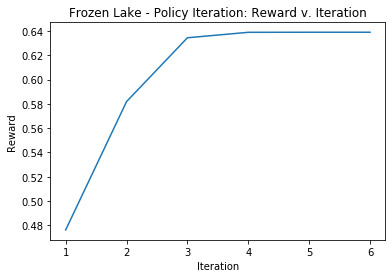

In [335]:
ax = sns.lineplot(x="Iteration", y="Reward", data=policy_df)
ax.set_title("Frozen Lake - Policy Iteration: Reward v. Iteration")

Text(0.5, 1.0, 'Frozen Lake - Policy Iteration: Mean V v. Iteration')

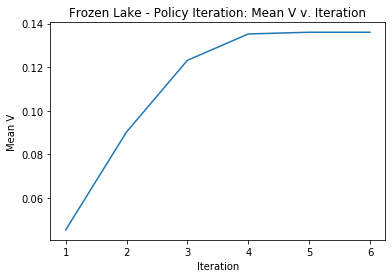

In [336]:
ax = sns.lineplot(x="Iteration", y="Mean V", data=policy_df)
ax.set_title("Frozen Lake - Policy Iteration: Mean V v. Iteration")

In [337]:
#ax = sns.lineplot(x="Iteration", y="Error", data=policy_df)

In [338]:
#ax = sns.barplot(x="Iteration", y="Time", data=policy_df)

### Value Iteration

In [389]:
mdp_val = MarkovDecisionProcess("FrozenLake-v0")
mdp_val.run("value_iteration")

mdp_val.output

 Iteration   Variation
         1    0.333333
         2    0.100000
         3    0.060000
         4    0.054000
         5    0.035100
         6    0.029160
         7    0.020655
         8    0.016694
         9    0.012663
        10    0.009986
        11    0.008062
        12    0.006474
        13    0.005474
        14    0.004693
        15    0.003987
        16    0.003420
        17    0.003040
        18    0.002714
        19    0.002436
        20    0.002175
        21    0.001935
        22    0.001715
        23    0.001516
        24    0.001337
        25    0.001178
        26    0.001035
Iterating stopped, epsilon-optimal policy found.


[{'State': None,
  'Action': None,
  'Reward': 0.3333333333333333,
  'Error': 0.3333333333333333,
  'Time': 0.0001780986785888672,
  'Max V': 0.3333333333333333,
  'Mean V': 0.020833333333333332,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 0.4333333333333333,
  'Error': 0.09999999999999999,
  'Time': 0.000431060791015625,
  'Max V': 0.4333333333333333,
  'Mean V': 0.03958333333333333,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 0.4933333333333333,
  'Error': 0.06,
  'Time': 0.0007259845733642578,
  'Max V': 0.4933333333333333,
  'Mean V': 0.05458333333333333,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 0.5293333333333333,
  'Error': 0.05400000000000002,
  'Time': 0.0011682510375976562,
  'Max V': 0.5293333333333333,
  'Mean V': 0.06695833333333333,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 0.5563333333333333,
  'Error': 0.03510000000000002,
  'Time': 0.0014209747314453125,
  'Max V': 0.55633333333

In [413]:
vals = {0: "left", 1: "down", 2: "right", 3: "up"}

output = [None] * 16

for idx, val in enumerate(mdp_val.policy):
    output[idx] = vals[val]

In [415]:
print(output)

['left', 'up', 'left', 'up', 'left', 'left', 'left', 'left', 'up', 'down', 'left', 'left', 'left', 'right', 'down', 'left']


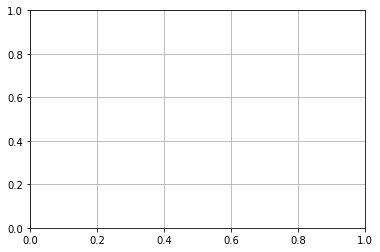

In [400]:
matplotlib.pyplot.grid(b=None)

In [390]:
value_df = pd.DataFrame(mdp_val.output)

Text(0.5, 1.0, 'Frozen Lake - Value Iteration: Reward v. Iteration')

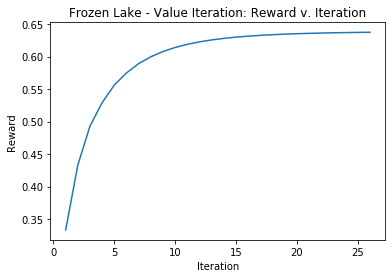

In [391]:
ax = sns.lineplot(x="Iteration", y="Reward", data=value_df)
ax.set_title("Frozen Lake - Value Iteration: Reward v. Iteration")

In [392]:
value_df
value_df['algorithm'] = 'value iteration'

In [393]:
policy_df
policy_df['algorithm'] = 'policy iteration'

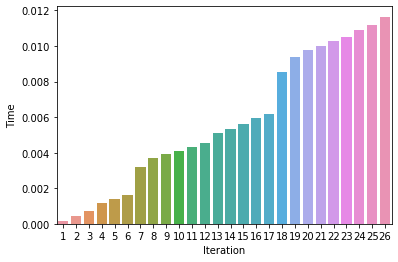

In [394]:
ax = sns.barplot(x="Iteration", y="Time", data=value_df)

In [395]:
comb = pd.concat([value_df, policy_df])

Text(0.5, 1.0, 'Frozen Lake: Reward vs. Iteration')

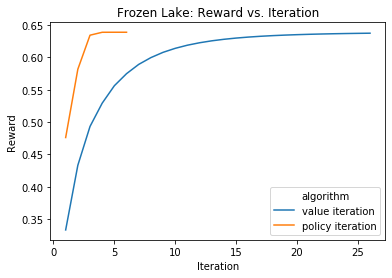

In [396]:
ax = sns.lineplot(x="Iteration", y="Reward", data=comb, hue="algorithm")
ax.set_title("Frozen Lake: Reward vs. Iteration")

Text(0.5, 1.0, 'Frozen Lake: Mean V vs. Iteration')

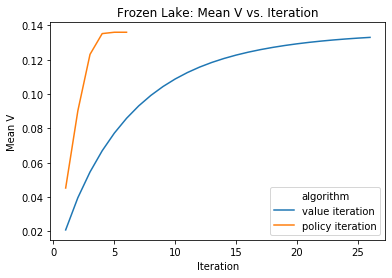

In [347]:
ax = sns.lineplot(x="Iteration", y="Mean V", data=comb, hue="algorithm")
ax.set_title("Frozen Lake: Mean V vs. Iteration")

Text(0.5, 1.0, 'Frozen Lake: Runtime vs. Iteration')

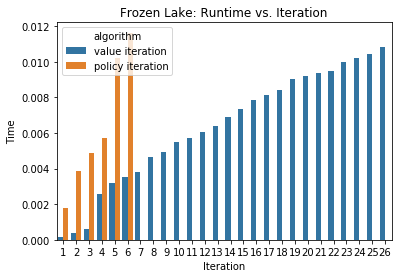

In [348]:
ax = sns.barplot(x="Iteration", y="Time", data=comb, hue="algorithm")
ax.set_title("Frozen Lake: Runtime vs. Iteration")

In [293]:
vi_output = pd.DataFrame()

for discount_factor in [0.6, 0.7, 0.8, 0.9, 1]:
    mdp_val = MarkovDecisionProcess("FrozenLake-v0", discount_factor)
    mdp_val.run("value_iteration") 
    df = pd.DataFrame(mdp_val.output)
    df['algorithm'] = "value_iteration"
    df['discount_factor'] = discount_factor
    vi_output = vi_output.append(df)

 Iteration   Variation
         1    0.333333
         2    0.066667
         3    0.026667
         4    0.016000
         5    0.006933
         6    0.003840
Iterating stopped, epsilon-optimal policy found.
 Iteration   Variation
         1    0.333333
         2    0.077778
         3    0.036296
         4    0.025407
         5    0.012845
         6    0.008300
         7    0.004573
         8    0.002874
Iterating stopped, epsilon-optimal policy found.
 Iteration   Variation
         1    0.333333
         2    0.088889
         3    0.047407
         4    0.037926
         5    0.021913
         6    0.016182
         7    0.010188
         8    0.007320
         9    0.004935
        10    0.003459
        11    0.002483
Iterating stopped, epsilon-optimal policy found.
 Iteration   Variation
         1    0.333333
         2    0.100000
         3    0.060000
         4    0.054000
         5    0.035100
         6    0.029160
         7    0.020655
         8    0.016694
  

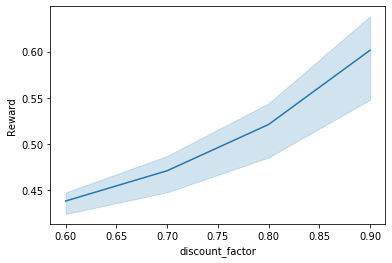

In [294]:
ax = sns.lineplot(x="discount_factor", y="Reward", data=output)


In [295]:
pi_output = pd.DataFrame()

for discount_factor in [0.6, 0.7, 0.8, 0.9]:
    mdp_val = MarkovDecisionProcess("FrozenLake-v0", discount_factor)
    mdp_val.run("policy_iteration") 
    df = pd.DataFrame(mdp_val.output)
    df['algorithm'] = "policy_iteration"
    df['discount_factor'] = discount_factor
    pi_output = pi_output.append(df)

 Iteration   Variation
         1           6
         2           5
         3           2
         4           0
Iterating stopped, unchanging policy found.
 Iteration   Variation
         1           6
         2           5
         3           2
         4           0
Iterating stopped, unchanging policy found.
 Iteration   Variation
         1           6
         2           6
         3           2
         4           1
         5           0
Iterating stopped, unchanging policy found.
 Iteration   Variation
         1           7
         2           5
         3           4
         4           2
         5           1
         6           0
Iterating stopped, unchanging policy found.


In [380]:
df_output = pd.concat([vi_output, pi_output, ql_output])

Text(0.5, 1.0, 'Frozen Lake: Reward vs. Discount Factor')

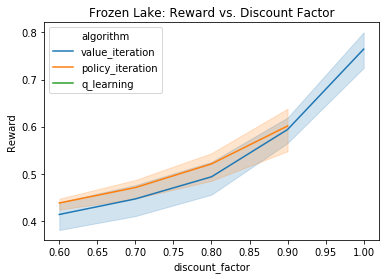

In [381]:
ax = sns.lineplot(x="discount_factor", y="Reward", hue="algorithm", data=df_output)
ax.set_title("Frozen Lake: Reward vs. Discount Factor")

### Q Learning

In [383]:
# Plot the Q-values as a heatmap
mdp_ql = MarkovDecisionProcess("FrozenLake-v0", alpha=0.1)
mdp_ql.run("q_learning")

mdp_ql.output

[{'State': 15,
  'Action': 1,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.00019288063049316406,
  'Alpha': 0.1,
  'Epsilon': 1.0,
  'Gamma': 0.9,
  'Max V': 0.0,
  'Mean V': 0.0,
  'Iteration': 1},
 {'State': 15,
  'Action': 1,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.0003457069396972656,
  'Alpha': 0.001,
  'Epsilon': 0.99,
  'Gamma': 0.9,
  'Max V': 0.0,
  'Mean V': 0.0,
  'Iteration': 2},
 {'State': 15,
  'Action': 1,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.0005156993865966797,
  'Alpha': 0.001,
  'Epsilon': 0.9801,
  'Gamma': 0.9,
  'Max V': 0.0,
  'Mean V': 0.0,
  'Iteration': 3},
 {'State': 15,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.0006909370422363281,
  'Alpha': 0.001,
  'Epsilon': 0.9702989999999999,
  'Gamma': 0.9,
  'Max V': 0.0,
  'Mean V': 0.0,
  'Iteration': 4},
 {'State': 15,
  'Action': 3,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.0008549690246582031,
  'Alpha': 0.001,
  'Epsilon': 0.96059601,
  'Gamma': 0.9,
  'Max V': 0.0,
  'Mean V':

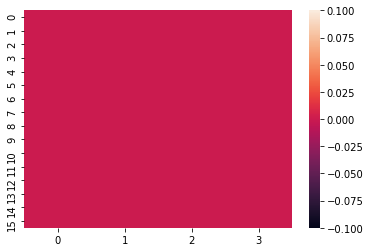

In [384]:
sns.heatmap(mdp_ql.Q)

In [385]:
ql_output = pd.DataFrame()

for x in range(10):
    for alpha in [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
        mdp_ql = MarkovDecisionProcess("FrozenLake-v0", alpha=alpha)
        mdp_ql.run("q_learning")
        df = pd.DataFrame(mdp_ql.output)
        df['algorithm'] = "q_learning"
        df['learning_rate'] = alpha
        ql_output = ql_output.append(df)

In [386]:
ql_df = pd.DataFrame(mdp_ql.output)

In [387]:
#                  alpha=0.1, alpha_decay=0.99, alpha_min=0.001,
#                  epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.99,
#                  n_iter=10000, skip_check=False, iter_callback=None,
#                  run_stat_frequency=None):

Text(0.5, 1.0, 'Frozen Lake: Reward vs. Learning Rate')

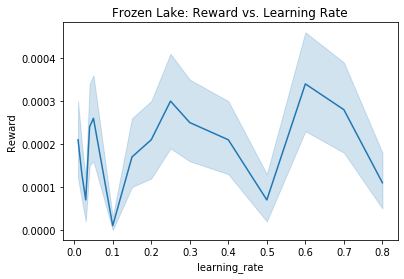

In [388]:
ax = sns.lineplot(x="learning_rate", y="Reward", data=ql_output)
ax.set_title("Frozen Lake: Reward vs. Learning Rate")

In [221]:
# https://towardsdatascience.com/practical-reinforcement-learning-02-getting-started-with-q-learning-582f63e4acd9
# gamma - Discount factor 
# alpha - Learning rate 
ql_df.sort_values('Reward').describe()

,State,Action,Reward,Error,Time,Alpha,Epsilon,Gamma,Max V,Mean V,Iteration
count,10000.000000,10000.000000,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.00000
mean,9.123100,0.161100,0.0,0.0,0.373004,0.001944,0.106709,0.5,0.0,0.0,5000.50000
std,3.625501,0.597313,0.0,0.0,0.197740,0.006887,0.057960,0.0,0.0,0.0,2886.89568
min,0.000000,0.000000,0.0,0.0,0.000143,0.001000,0.100000,0.5,0.0,0.0,1.00000
25%,5.000000,0.000000,0.0,0.0,0.209511,0.001000,0.100000,0.5,0.0,0.0,2500.75000
50%,11.000000,0.000000,0.0,0.0,0.377481,0.001000,0.100000,0.5,0.0,0.0,5000.50000
75%,12.000000,0.000000,0.0,0.0,0.542160,0.001000,0.100000,0.5,0.0,0.0,7500.25000
max,15.000000,3.000000,0.0,0.0,0.710341,0.100000,1.000000,0.5,0.0,0.0,10000.00000


In [24]:
ql_df

,State,Action,Reward,Error,Time,Alpha,Epsilon,Gamma,Max V,Mean V,Iteration
0,4,2,0.0,0.000000e+00,0.000161,0.10000,1.000000,0.9,0.000000,0.000000,1
1,0,1,0.0,0.000000e+00,0.000289,0.09900,0.990000,0.9,0.000000,0.000000,2
2,0,1,0.0,0.000000e+00,0.000405,0.09801,0.980100,0.9,0.000000,0.000000,3
3,4,3,0.0,0.000000e+00,0.000509,0.09703,0.970299,0.9,0.000000,0.000000,4
4,0,2,0.0,0.000000e+00,0.000613,0.09606,0.960596,0.9,0.000000,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...
9995,5,0,0.0,0.000000e+00,0.712758,0.00100,0.100000,0.9,0.005972,0.000374,9996
9996,5,0,0.0,0.000000e+00,0.712814,0.00100,0.100000,0.9,0.005972,0.000374,9997
9997,5,0,0.0,0.000000e+00,0.712874,0.00100,0.100000,0.9,0.005972,0.000374,9998
9998,5,0,0.0,0.000000e+00,0.712931,0.00100,0.100000,0.9,0.005972,0.000374,9999


In [47]:
# TUNE PARAMETERS
# alpha=0.1, alpha_decay=0.99, alpha_min=0.001,
#                  epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.99,

### Large Problem

In [184]:
import numpy as np
import pandas as pd

from itertools import product
from functools import reduce

# adapted from Laurens Janssen
# https://gist.github.com/iiLaurens/ba9c479e71ee4ceef816ad50b87d9ebd

class BlackJack():

    def __init__(self, card_list=[2,3,4,5,6,7,8,9,10,10,10,10,11],
                 dealer_skip=17):
        self.ACTIONLIST = {
            0: 'skip',
            1: 'draw'
        }

        self.CARDS = np.array(card_list)
        self.BLACKJACK = 21
        self.DEALER_SKIP = dealer_skip
        self.STARTING_CARDS_PLAYER = 2
        self.STARTING_CARDS_DEALER = 1
        self.current_state = 0

        STATELIST = {0: (0,0,0)} # Game start state
        self.STATELIST = {**STATELIST, **{nr+1:state for nr, state in enumerate(product(range(2), range(self.CARDS.min()*self.STARTING_CARDS_PLAYER,self.BLACKJACK + 2), range(self.CARDS.min()*self.STARTING_CARDS_DEALER, self.BLACKJACK+2)))}}

        T = np.zeros((len(self.ACTIONLIST), len(self.STATELIST), len(self.STATELIST)))
        for a, i, j in product(self.ACTIONLIST.keys(), self.STATELIST.keys(), self.STATELIST.keys()):
            T[a,i,j] = self.blackjack_probability(a, i, j)
            
        # Define reward matrix
        R = np.zeros(len(self.STATELIST))
        for s in self.STATELIST.keys():
            R[s] = self.blackjack_rewards(s)
        #for a, s in product(self.ACTIONLIST.keys(), self.STATELIST.keys()):
        #    R[s, a] = self.blackjack_rewards(a, s)

        # Check that we have a valid transition matrix with transition probabilities summing to 1
        assert (T.sum(axis=2).round(10) == 1).all() 
        self.T = T
        self.R = R

        # deal first card
        self.step(1)

    def cartesian(self, x,y):
        return np.dstack(np.meshgrid(x, y)).reshape(-1, 2).sum(axis=1)


    def deal_card_probability(self, count_now, count_next, take=1):
        if take > 1:
            cards = reduce(self.cartesian, [self.CARDS]*take)
        else:
            cards = self.CARDS
            
        return (np.minimum(count_now + cards, self.BLACKJACK + 1) == count_next).sum() / len(cards)


    def is_gameover(self, skipped, player, dealer):
        return any([
            dealer >= self.DEALER_SKIP and skipped == 1,
            dealer > self.BLACKJACK and skipped == 1,
            player > self.BLACKJACK
         ])

    def blackjack_probability(self, action, stateid_now, stateid_next):
        skipped_now, player_now, dealer_now  = self.STATELIST[stateid_now]
        skipped_next, player_next, dealer_next = self.STATELIST[stateid_next]
        
        if stateid_now == stateid_next:
            # Game cannot stay in current state
            return 0.0
        
        if stateid_now == 0:
            if skipped_next == 1:
                # After start of the game the game cannot be in a skipped state
                return 0
            else:
                # State lower or equal than 1 is a start of a new game
                dealer_prob = self.deal_card_probability(0, dealer_next, take=self.STARTING_CARDS_DEALER)
                player_prob = self.deal_card_probability(0, player_next, take=self.STARTING_CARDS_PLAYER)

                return dealer_prob * player_prob
        
        if self.is_gameover(skipped_now, player_now, dealer_now):
            # We arrived at end state, now reset game
            return 1.0 if stateid_next == 0 else 0.0
        
        if skipped_now == 1:
            if skipped_next == 0 or player_next != player_now:
                # Once you skip you keep on skipping in blackjack
                # Also player cards cannot increase once in a skipped state
                return 0.0
        
        if self.ACTIONLIST[action] == 'skip' or skipped_now == 1:
            # If willingly skipped or in forced skip (attempted draw in already skipped game):
            if skipped_next != 1 or player_now != player_next:
                # Next state must be a skipped state with same card count for player
                return 0.0
        
        if self.ACTIONLIST[action] == 'draw' and skipped_now == 0 and skipped_next != 0:
            # Next state must be a drawable state
            return 0.0
        
        if dealer_now != dealer_next and player_now != player_next:
            # Only the player or the dealer can draw a card. Not both simultaneously!
            return 0.0

        # Now either the dealer or the player draws a card
        if self.ACTIONLIST[action] == 'draw' and skipped_now == 0:
            # Player draws a card
            prob = self.deal_card_probability(player_now, player_next, take=1)
        else:
            # Dealer draws a card
            if dealer_now >= self.DEALER_SKIP:
                if dealer_now != dealer_next:
                    # Dealer always stands once it has a card count higher than set amount
                    return 0.0
                else:
                    # Dealer stands
                    return 1.0

            prob = self.deal_card_probability(dealer_now, dealer_next, take=1)

        return prob


    #def blackjack_rewards(self, action, stateid):
    def blackjack_rewards(self, stateid):
        skipped, player, dealer  = self.STATELIST[stateid]
        
        if not self.is_gameover(skipped, player, dealer):
            return 0
        elif player > self.BLACKJACK or (player <= dealer and dealer <= self.BLACKJACK):
            return -1
        elif player == self.BLACKJACK and dealer < self.BLACKJACK:
            return 1.5
        elif player > dealer or dealer > self.BLACKJACK:
            return 1
        else:
            raise Exception(f'Undefined reward: {skipped}, {player}, {dealer}')
        
        
    def get_matrices(self):
        # Define transition matrix

        return self.T, self.R

    def reset(self):
        #self = self.__init__(self.CARDS, self.DEALER_SKIP)
        self.current_state = 0
        self.step(1)
        return self.current_state

    def step(self, action):
        """take an action
        randomly draw next state
        return state, reward, and done
        if action == 0, then just keep looping through
        dealer actions until game is over
        """
        turn_continue = True
        while turn_continue:
            prob = np.random.random()
            probs = self.T[action, self.current_state, :]
            #print(prob)
            #print(probs)
            #print(probs.sum())
            #print('where')
            #print(np.where(probs > prob))
            probs = probs.cumsum()
            new_state = np.where(probs >= prob)[0][0]
            done = self.is_gameover(*self.STATELIST[new_state])
            self.current_state = new_state
            #print('new state', self.STATELIST[self.current_state])
            turn_continue = (action == 0) and (not done)
        reward = self.R[new_state]
        return new_state, reward, done
        


    def print_blackjack_policy(self, policy):
        idx = pd.MultiIndex.from_tuples(list(STATELIST.values()), names=['Skipped', 'Player', 'Dealer'])
        S = pd.Series(['x' if i == 1 else '.' for i in policy], index=idx)
        S = S.loc[S.index.get_level_values('Skipped')==0].reset_index('Skipped', drop=True)
        S = S.loc[S.index.get_level_values('Player')>0]
        S = S.loc[S.index.get_level_values('Dealer')>0]
        return S.unstack(-1)

    def print_blackjack_rewards(self):
        idx = pd.MultiIndex.from_tuples(list(self.STATELIST.values()), names=['Skipped', 'Player', 'Dealer'])
        S = pd.Series(R[:,0], index=idx)
        S = S.loc[S.index.get_level_values('Skipped')==1].reset_index('Skipped', drop=True)
        S = S.loc[S.index.get_level_values('Player')>0]
        S = S.loc[S.index.get_level_values('Dealer')>0]
        return S.unstack(-1)



In [199]:
blackjack = BlackJack()

In [200]:
pi = mdptoolbox.mdp.PolicyIteration(blackjack.T, blackjack.R, 0.2)
pi_output = pi.run()

In [201]:
policy_df = pd.DataFrame(pi_output)
policy_df['algorithm'] = 'policy_iteration'

In [202]:
policy_df

,State,Action,Reward,Error,Time,Max V,Mean V,Iteration,algorithm
0,None,None,1.497940,2.049450e-01,0.039101,1.497940,-0.132778,1,policy_iteration
1,None,None,1.498562,1.110223e-15,0.061121,1.498562,-0.114942,2,policy_iteration
2,None,None,1.498562,1.110223e-15,0.080591,1.498562,-0.114942,3,policy_iteration


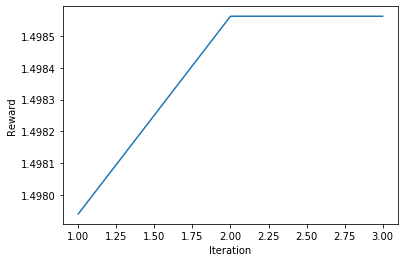

In [203]:
ax = sns.lineplot(x="Iteration", y="Reward", data=policy_df)

In [204]:
vi = mdptoolbox.mdp.ValueIteration(blackjack.T, blackjack.R, 0.2)
vi_output = vi.run()


In [205]:
value_df = pd.DataFrame(vi_output)
value_df['algorithm'] = 'value_iteration'

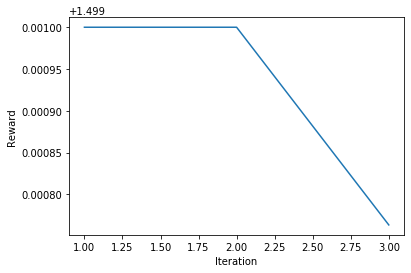

In [206]:
ax = sns.lineplot(x="Iteration", y="Reward", data=value_df)

In [193]:
value_df

,State,Action,Reward,Error,Time,Max V,Mean V,Iteration,algorithm
0,None,None,1.500000,2.500000,0.000987,1.500000,-0.115144,1,value_iteration
1,None,None,1.500000,2.500000,0.002071,1.500000,-0.110819,2,value_iteration
2,None,None,1.500000,1.597633,0.005042,1.500000,-0.117462,3,value_iteration
3,None,None,1.494083,0.917387,0.006390,1.494083,-0.133505,4,value_iteration
4,None,None,1.350831,0.328862,0.007515,1.350831,-0.173599,5,value_iteration
5,None,None,1.390109,0.190568,0.008709,1.390109,-0.209133,6,value_iteration
6,None,None,1.390109,0.158846,0.009897,1.390109,-0.219408,7,value_iteration
7,None,None,1.363182,0.100999,0.011059,1.363182,-0.232576,8,value_iteration
8,None,None,1.301461,0.090462,0.012236,1.301461,-0.259655,9,value_iteration
9,None,None,1.284692,0.065042,0.013428,1.284692,-0.286823,10,value_iteration


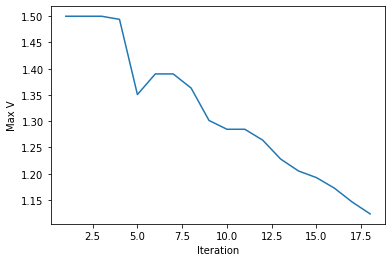

In [194]:
ax = sns.lineplot(x="Iteration", y="Max V", data=value_df)

In [207]:
comb = pd.concat([value_df, policy_df])

Text(0.5, 1.0, 'Blackjack: Reward vs. Iteration')

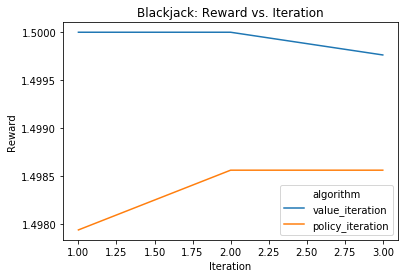

In [208]:
ax = sns.lineplot(x="Iteration", y="Reward", data=comb, hue="algorithm")
ax.set_title("Blackjack: Reward vs. Iteration")

Text(0.5, 1.0, 'Blackjack: Mean V vs. Iteration')

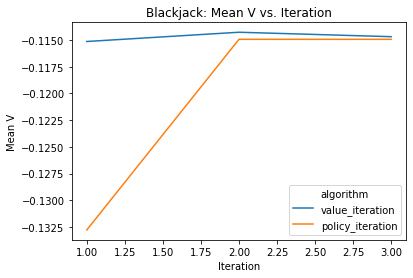

In [209]:
ax = sns.lineplot(x="Iteration", y="Mean V", data=comb, hue="algorithm")
ax.set_title("Blackjack: Mean V vs. Iteration")

Text(0.5, 1.0, 'Blackjack: Runtime vs. Iteration')

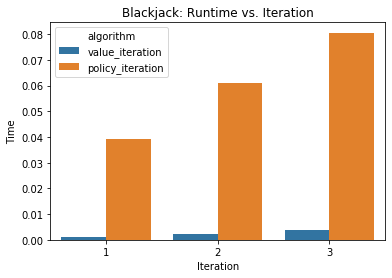

In [210]:
ax = sns.barplot(x="Iteration", y="Time", data=comb, hue="algorithm")
ax.set_title("Blackjack: Runtime vs. Iteration")

In [176]:
vi_df = pd.DataFrame()

for discount_factor in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    vi = mdptoolbox.mdp.ValueIteration(blackjack.T, blackjack.R, discount_factor)
    vi_output = vi.run()
    df = pd.DataFrame(vi_output)
    df['algorithm'] = "value_iteration"
    df['discount_factor'] = discount_factor
    vi_df = vi_df.append(df)

Text(0.5, 1.0, 'Blackjack: Value Iteration Reward by Discount Factor')

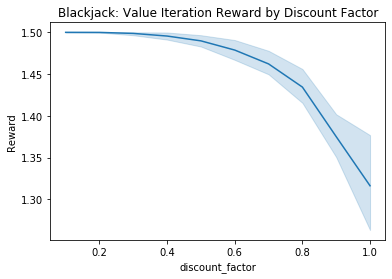

In [177]:
ax = sns.lineplot(x="discount_factor", y="Reward", data=vi_df)
ax.set_title("Blackjack: Value Iteration Reward by Discount Factor")


In [178]:
pi_df = pd.DataFrame()

for discount_factor in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    pi = mdptoolbox.mdp.PolicyIteration(blackjack.T, blackjack.R, discount_factor)
    pi_output = pi.run()
    df = pd.DataFrame(pi_output)
    df['algorithm'] = "policy_iteration"
    df['discount_factor'] = discount_factor
    pi_df = pi_df.append(df)

Text(0.5, 1.0, 'Blackjack: Policy Iteration Reward by Discount Factor')

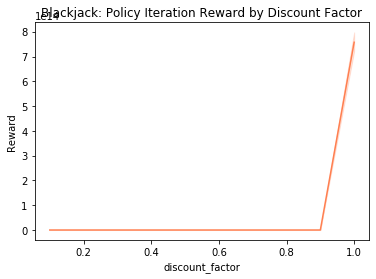

In [183]:
ax = sns.lineplot(x="discount_factor", y="Reward", data=pi_df, color='coral')
ax.set_title("Blackjack: Policy Iteration Reward by Discount Factor")


In [165]:
df_output = pd.concat([vi_df, pi_df])

In [169]:
df_output

,State,Action,Reward,Error,Time,Max V,Mean V,Iteration,algorithm,discount_factor
0,None,None,1.500000e+00,2.500000,0.001427,1.500000e+00,-1.151439e-01,1,value_iteration,0.1
1,None,None,1.500000e+00,0.250000,0.002859,1.500000e+00,-1.147114e-01,2,value_iteration,0.1
0,None,None,1.500000e+00,2.500000,0.001471,1.500000e+00,-1.151439e-01,1,value_iteration,0.2
1,None,None,1.500000e+00,0.500000,0.004373,1.500000e+00,-1.142789e-01,2,value_iteration,0.2
2,None,None,1.499763e+00,0.063905,0.006125,1.499763e+00,-1.146943e-01,3,value_iteration,0.2
...,...,...,...,...,...,...,...,...,...,...
995,None,None,6.823798e+14,0.750000,20.122769,6.823798e+14,6.823798e+14,996,policy_iteration,1.0
996,None,None,6.699284e+14,1.000000,20.142479,6.699284e+14,6.699284e+14,997,policy_iteration,1.0
997,None,None,1.047255e+15,1.375000,20.163194,1.047255e+15,1.047255e+15,998,policy_iteration,1.0
998,None,None,8.235668e+14,0.750000,20.185796,8.235668e+14,8.235668e+14,999,policy_iteration,1.0


Text(0.5, 1.0, 'Blackjack: Reward vs. Discount Factor')

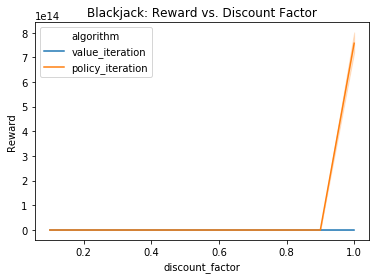

In [171]:
ax = sns.lineplot(x="discount_factor", y="Reward", hue="algorithm", data=df_output)
ax.set_title("Blackjack: Reward vs. Discount Factor")

In [314]:
ql = mdptoolbox.mdp.QLearning(blackjack.T, blackjack.R, 0.9)
ql.setVerbose()
ql_output = ql.run()

In [315]:
ql.Q

array([[-0.0001706 , -0.00022432],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [316]:
ql.Q.transpose()

array([[-0.0001706 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00022432,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Text(0.5, 1, 'Blackjack: Q-matrix Heatmap')

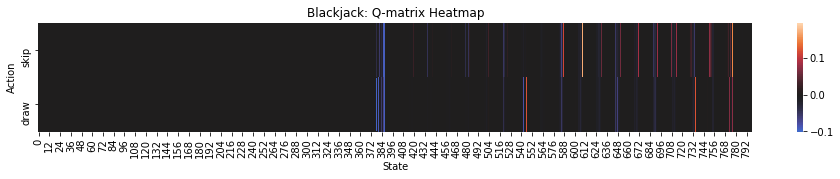

In [317]:
#     0: 'skip',
#     1: 'draw'
plt.figure(figsize=(16, 2))
ax = sns.heatmap(ql.Q.transpose(), center=0, yticklabels=["skip","draw"])
ax.set_xlabel("State")
ax.set_ylabel("Action")
ax.set_title("Blackjack: Q-matrix Heatmap")

In [265]:
ql.

799

In [264]:
ql.Q

array([[-2.81833055e-03, -2.43275465e-04],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 1.61719767e-09,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00]])

In [263]:
ql.R

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0

In [ ]:
# QL/PI/VI : Reward / Max V/ Mean V vs # of iterations
# GW: I am plotting arrows to indicate directions
# GW: I am plotting heatmap for values